In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Load some data

Here we have 4 different parameters, sepal length/width and petal length/width.  Plus a "true" classification.

In [2]:
iris = sns.load_dataset("iris")
print(iris.shape)


(150, 5)


## Let's look at how the "pair" plots turn out:

Each column is a coordinate axis

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


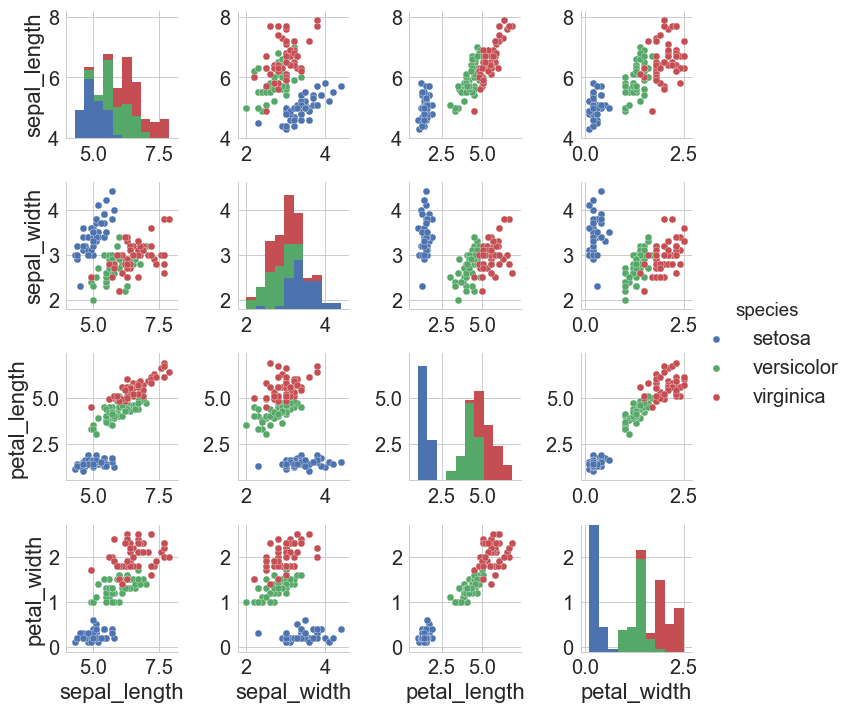

In [4]:
g = sns.pairplot(iris, hue="species")

We can get the mean value and standard deviation of each feature:

In [5]:
print( iris.mean() )

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64


In [6]:
print( iris.std() )

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64


## Reduce the feature space

How can we reduce the feature space but still retain the most meaningful information about the features?

We will use Principal Component Analysis (PCA), which finds the directions of maximum variance in high-dimensional data, and projects it into a smaller dimensional subspace.

Let us walk throught the steps of obtaining the principal components:

1) **X**: shifted dataset (each feature has mean value of zero)

In [7]:
X = iris.iloc[:,:4] - iris.iloc[:,:4].mean()

2) Decide whether or not to standardize. If you want to standardize, divide each observation in a column by that column’s standard deviation. In this new dataset **Z** each feature has mean zero and standard deviation 1.

This decision depends on the problem you are solving (it is a modeling choice!). If some variables have a large variance and some small, since PCA maximizes the variance, it will weight more the features with large variance.  If you want your PCA to be independent of the variance, standardizing the features will do that. 

**Z**: shifted and standardized dataset (each feature has mean value of zero and standard deviation 1)


In [8]:
Z = X / iris.iloc[:,:4].std()

The features on the iris dataset were all measured in the same scale, and have similar standard deviation. So for this example, standardizing is not necessarily desirable. We will look at both scenarios here for completeness.


### Non-Standardized dataset:

3) Create the covariance matrix (by a scale factor) of **X**

In [9]:
A = X.T.dot(X)
print(A)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length    102.168333    -6.322667      189.8730    76.924333
sepal_width      -6.322667    28.306933      -49.1188   -18.124267
petal_length    189.873000   -49.118800      464.3254   193.045800
petal_width      76.924333   -18.124267      193.0458    86.569933


4) Obtain the eigenvalues and eigenvectors of **A**.

In [10]:
diag,U = la.eig(A)
print(diag)

[ 630.0080142    36.15794144   11.65321551    3.55142885]


5) Obtain the new feature set ** Xnew = X U **

In [11]:
Xnew = X@U

6) Note that Xnew.T @ X gives the the covariance matrix of the new feature dataset, that has the variance as the eigenvalues of A and zero covariances.

In [ ]:
print(Xnew.T@Xnew)

7) How many principal components (columns of Xnew) are we going to choose for our new feature subspace? 

The **explained variance** tells us how much variance can be attributed to each of the principal components.

[92.461872320172716, 5.3066483117067884, 0.52121838732753756, 1.7102609807929752]


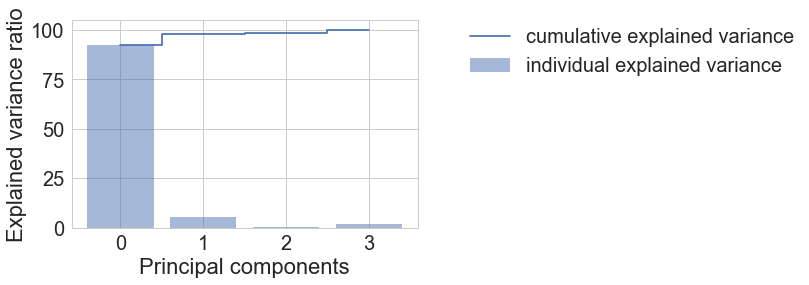

In [13]:
#The eigenvalues are the variances
# sum of all variances
tot = sum(diag)
# explained variance
exp_var = [(i / tot)*100 for i in diag]
cum_var_exp = np.cumsum(exp_var)
print(exp_var)


plt.bar(range(4), exp_var, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()

The plot above indicates that about 92% of the variance can be explained by the first principal component alone. 

The other principal components bear very little information, and can be dropped without losing to much information. 


In [14]:
iris['p0'] = Xnew[:,0]
iris['p1'] = Xnew[:,1]

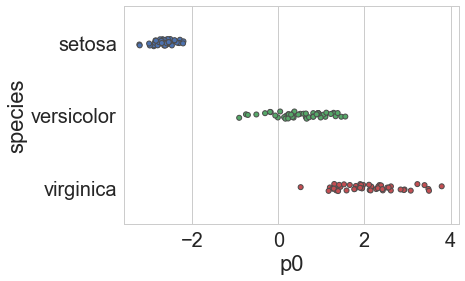

In [15]:
sns.stripplot(x="p0",y="species", data=iris, jitter=0.05, linewidth=1)

In [ ]:
g = sns.lmplot('p0', 'p1', iris, hue='species', fit_reg=False, size=8, scatter_kws={'alpha':0.7,'s':60})

### Standardized dataset:

[ 434.85617466  136.19054025   21.86677446    3.08651063]
[72.962445413299875, 22.850761786701781, 3.6689218892828785, 0.51787091071547464]


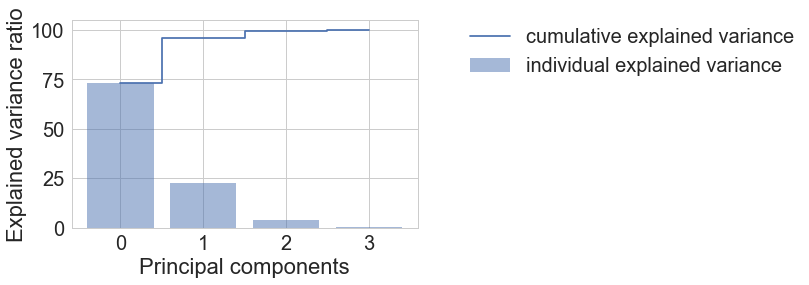

In [16]:
A = Z.T.dot(Z)

diag,U = la.eig(A)
print(diag)

Xnew = X@U

tot = sum(diag)
exp_var = [(i / tot)*100 for i in diag]
cum_var_exp = np.cumsum(exp_var)
print(exp_var)


plt.bar(range(4), exp_var, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()

The plot above indicates that about 96% of the variance can be explained by the first two principal components. The other two principal components bear very little information, and can be dropped without losing to much information.

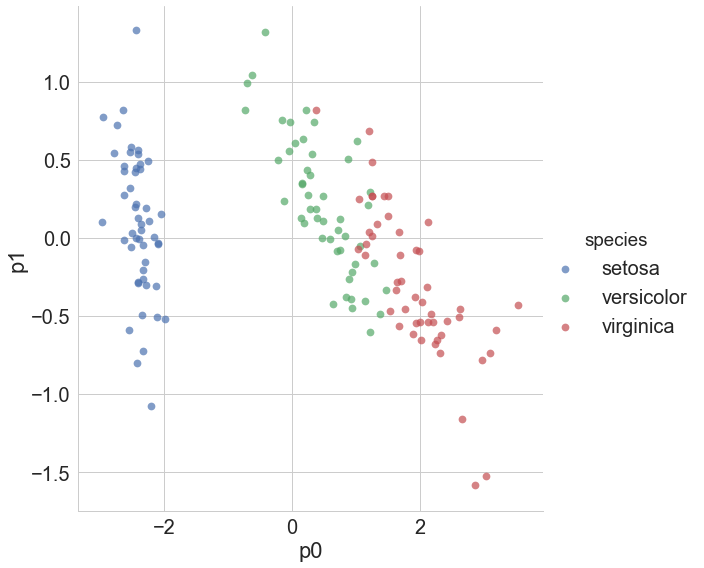

In [17]:
iris['p0'] = Xnew[:,0]
iris['p1'] = Xnew[:,1]
g = sns.lmplot('p0', 'p1', iris, hue='species', fit_reg=False, size=8, scatter_kws={'alpha':0.7,'s':60})

### Using SVD:

In [ ]:
U, S, V = np.linalg.svd(Z, full_matrices=False)
print(S)
variances = S**2


In [ ]:
tot = sum(variances)
var_exp = [(i / tot)*100 for i in variances]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)


plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()